In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import perceval as pcvl
import perceval.components as symb
import numpy as np
import sympy as sp

from Loop import *

In [2]:
#build the circuit and name it
bsg = pcvl.Circuit(8, name = "BSG")
bsg.add((0,1), symb.BS.H())
bsg.add((2,3), symb.BS.H())
bsg.add((4,5), symb.BS.H())
bsg.add((6,7), symb.BS.H())

bsg.add((0,1), symb.BS.H(np.pi))
bsg.add((1,2), symb.BS.H(np.pi))
bsg.add((0,1), symb.BS.H(np.pi))

bsg.add((4,5), symb.BS.H(np.pi))
bsg.add((5,6), symb.BS.H(np.pi))
bsg.add((4,5), symb.BS.H(np.pi))

bsg.add((6,7), symb.BS.H())


q0 = Qbit(0, logical=False)
q0.id = 0
f0 = Qbit(2, logical=False)
f1 = Qbit(4, logical=False)
q1 = Qbit(6, logical=False)
q1.id = 1

l = Loop(circuit=bsg, photons=photons_from_qubit([q0, f0, f1, q1]), qbits=[q0, f0, f1, q1])
l.fuse2(f0, f1)

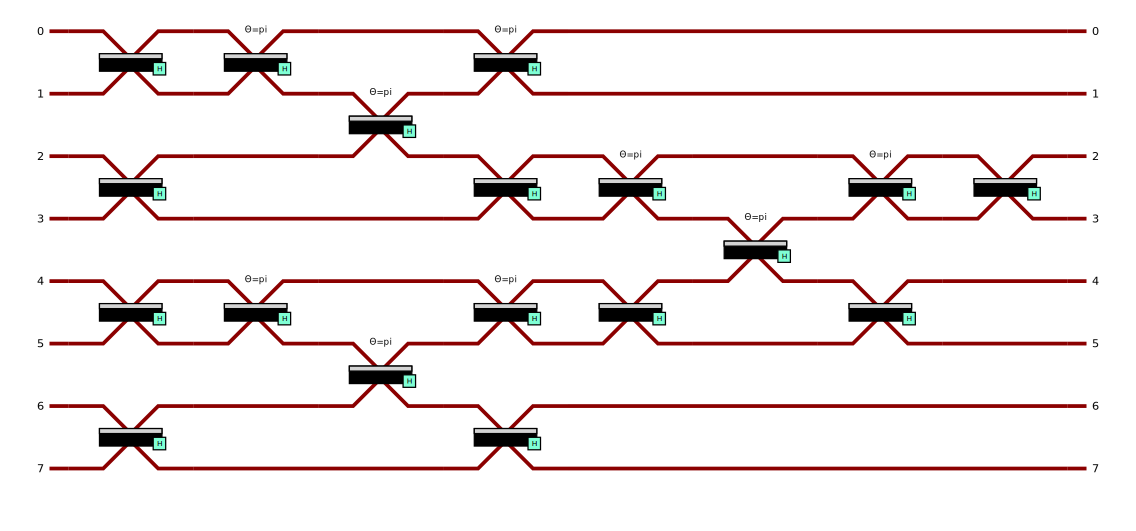

In [3]:
#display the circuit
pcvl.pdisplay(l.circuit)

In [4]:
l.calc_in_state()
print("Input state: ", l.in_state)
print("Total number of photons: ", l.nph)

Input state:  [1, 0, 1, 0, 1, 0, 1, 0]
Total number of photons:  4


In [11]:
#compute all the possible out states, partitioning 4 photons in 8 lines and witnessing (but not logically formatting!)
l.calc_out_states(logical=False, witness=True)
print(l.out_states)

[[0, 0, 1, 0, 1, 0, 0, 2], [0, 0, 1, 0, 1, 0, 1, 1], [0, 0, 1, 0, 1, 0, 2, 0], [0, 1, 1, 0, 1, 0, 0, 1], [0, 1, 1, 0, 1, 0, 1, 0], [0, 2, 1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0], [1, 1, 1, 0, 1, 0, 0, 0], [2, 0, 1, 0, 1, 0, 0, 0]]


In [12]:
#compute all the possible amplitudes for all the possible out states
l.run()

[0, 1, 1, 0, 1, 0, 0, 1]
(-0.08838834764831843+0j)
[0, 1, 1, 0, 1, 0, 1, 0]
(0.08838834764831839+0j)
[1, 0, 1, 0, 1, 0, 0, 1]
(0.08838834764831842+0j)
[1, 0, 1, 0, 1, 0, 1, 0]
(0.0883883476483185+0j)


In [13]:
#keep only the logical output states: the generation is heraled, we get the same result as above...
l.run_format()

0 True 1 True 
(-0.08838834764831843+0j)
0 True 1 False 
(0.08838834764831839+0j)
0 False 1 True 
(0.08838834764831842+0j)
0 False 1 False 
(0.0883883476483185+0j)
